In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train = y_train.flatten()
y_test = y_test.flatten()

C:\Users\Riza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')]]

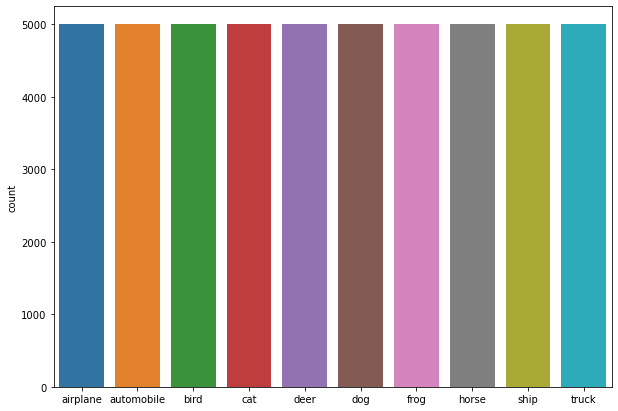

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

In [5]:
np.isnan(x_train).any()
np.isnan(x_test).any()

False

In [6]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [7]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


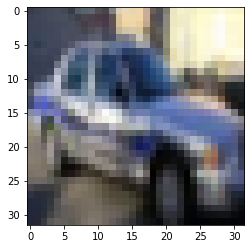

In [8]:
plt.imshow(x_train[311])
print(y_train[311])

In [9]:
batch_size = 5
num_classes = 10
epochs = 5

In [10]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [11]:
cifar10_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-04),
            loss='categorical_crossentropy', metrics=['acc'])

In [12]:
history = cifar10_model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, validation_data = (x_test, y_test))

Epoch 1/5
10000/10000 [==============================] - 41s 3ms/step - loss: 1.5055 - acc: 0.4505 - val_loss: 1.1193 - val_acc: 0.6017
Epoch 2/5
10000/10000 [==============================] - 34s 3ms/step - loss: 1.0850 - acc: 0.6128 - val_loss: 0.9556 - val_acc: 0.6588
Epoch 3/5
10000/10000 [==============================] - 34s 3ms/step - loss: 0.9435 - acc: 0.6646 - val_loss: 0.9027 - val_acc: 0.6768
Epoch 4/5
10000/10000 [==============================] - 34s 3ms/step - loss: 0.8555 - acc: 0.6968 - val_loss: 0.8366 - val_acc: 0.7080
Epoch 5/5
10000/10000 [==============================] - 34s 3ms/step - loss: 0.7888 - acc: 0.7200 - val_loss: 0.8120 - val_acc: 0.7147


In [13]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.8120 - acc: 0.7147
Test accuracy: 0.7146999835968018


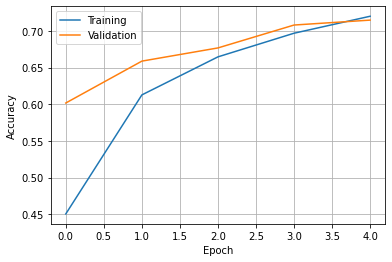

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()